# <center> WiDS x SAP Case Competition </center>

In [1]:
# loading relevant libraries

library(tidyverse)
library(tidymodels)
library(infer)
library(broom)
library(repr)
library(gridExtra) 
library(ggplot2)
library(GGally)
library(leaps)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
# reading the training set

training_set <- read_csv("train.csv")
head(training_set, 10)

Rows: 5000 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (10): ID, Age, AI_Interaction_Level, Satisfaction_with_AI_Services, AI_P...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ID,Age,AI_Interaction_Level,Satisfaction_with_AI_Services,AI_Personalization_Effectiveness,AI_Response_Time,Overall_Usage_Frequency,Customer_Service_Interactions,Change_in_Usage_Patterns,Customer_Churn
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,59,2,7,7,2,18,5,2,1
2,49,2,6,5,1,3,2,0,0
3,35,2,3,3,3,8,2,1,1
4,63,2,3,3,2,6,6,2,1
5,28,4,6,6,1,11,3,-1,0
6,41,3,1,1,3,28,2,-1,0
7,59,2,8,9,1,10,1,-2,1
8,39,3,8,8,2,12,10,-2,0
9,43,3,8,9,2,13,8,-1,0


In [3]:
# reading the testing set

testing_set <- read_csv("test.csv")
head(testing_set, 10)

Rows: 1250 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (10): ID, Age, AI_Interaction_Level, Satisfaction_with_AI_Services, AI_P...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ID,Age,AI_Interaction_Level,Satisfaction_with_AI_Services,AI_Personalization_Effectiveness,AI_Response_Time,Overall_Usage_Frequency,Customer_Service_Interactions,Change_in_Usage_Patterns,Customer_Churn
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,59,1,2,3,1,11,5,-1,1
2,49,3,4,3,2,2,0,2,1
3,35,3,7,6,2,22,4,0,1
4,63,2,8,8,1,25,4,-1,1
5,28,4,5,5,2,14,1,1,1
6,41,2,3,2,3,26,4,0,0
7,59,2,4,3,3,7,7,0,1
8,39,2,8,8,2,5,7,-2,0
9,43,2,4,5,3,20,10,-2,0


In [4]:
# checking for null values

length(which(is.na(training_set)))
length(which(is.na(testing_set)))

[1] 0

[1] 0

In [5]:
# converting binary response variable to fct for accuracy

training_set$Customer_Churn <- as.factor(training_set$Customer_Churn)
testing_set$Customer_Churn <- as.factor(testing_set$Customer_Churn)

head(training_set)
head(testing_set)

ID,Age,AI_Interaction_Level,Satisfaction_with_AI_Services,AI_Personalization_Effectiveness,AI_Response_Time,Overall_Usage_Frequency,Customer_Service_Interactions,Change_in_Usage_Patterns,Customer_Churn
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,59,2,7,7,2,18,5,2,1
2,49,2,6,5,1,3,2,0,0
3,35,2,3,3,3,8,2,1,1
4,63,2,3,3,2,6,6,2,1
5,28,4,6,6,1,11,3,-1,0
6,41,3,1,1,3,28,2,-1,0


ID,Age,AI_Interaction_Level,Satisfaction_with_AI_Services,AI_Personalization_Effectiveness,AI_Response_Time,Overall_Usage_Frequency,Customer_Service_Interactions,Change_in_Usage_Patterns,Customer_Churn
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,59,1,2,3,1,11,5,-1,1
2,49,3,4,3,2,2,0,2,1
3,35,3,7,6,2,22,4,0,1
4,63,2,8,8,1,25,4,-1,1
5,28,4,5,5,2,14,1,1,1
6,41,2,3,2,3,26,4,0,0


## Exploratory Data Analysis

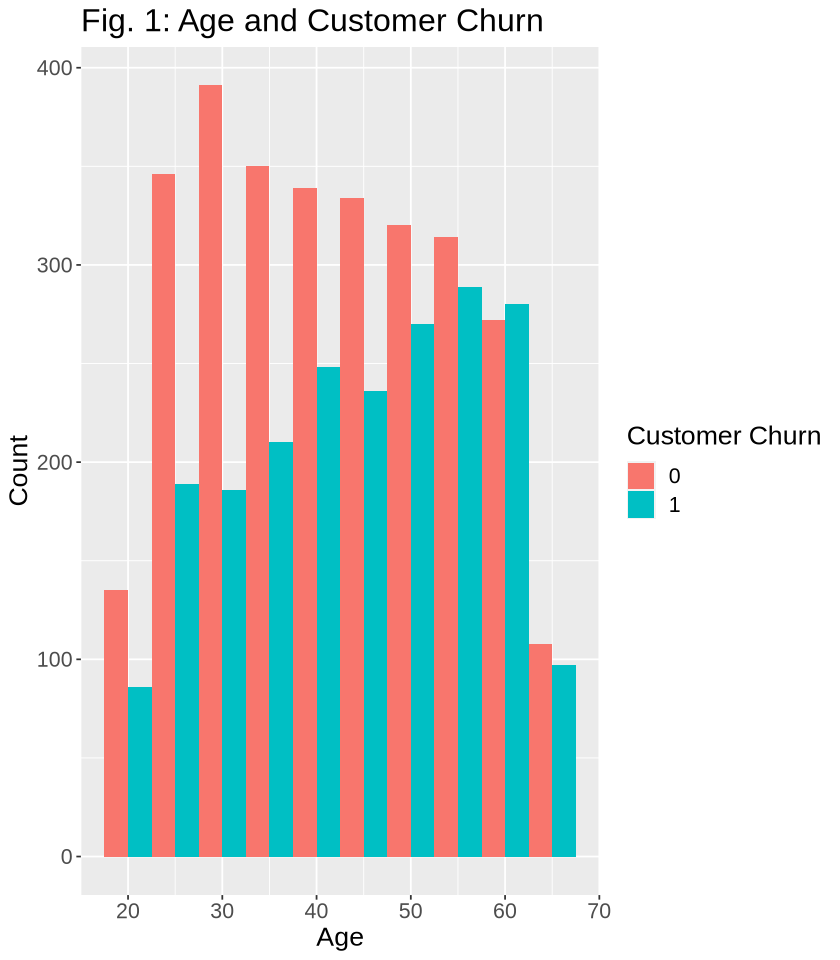

In [6]:
# visualizing relationship between age and customer churn
options(repr.plot.width = 7, repr.plot.height = 8)

training_age <- ggplot(training_set, aes(x = Age)) +
    ggtitle("Fig. 1: Age and Customer Churn") +
    geom_histogram(aes(fill = Customer_Churn), position = "dodge", binwidth = 5) +
    xlab("Age") +
    ylab("Count") +
    labs(fill = "Customer Churn") +
    theme(text = element_text(size = 16))

training_age

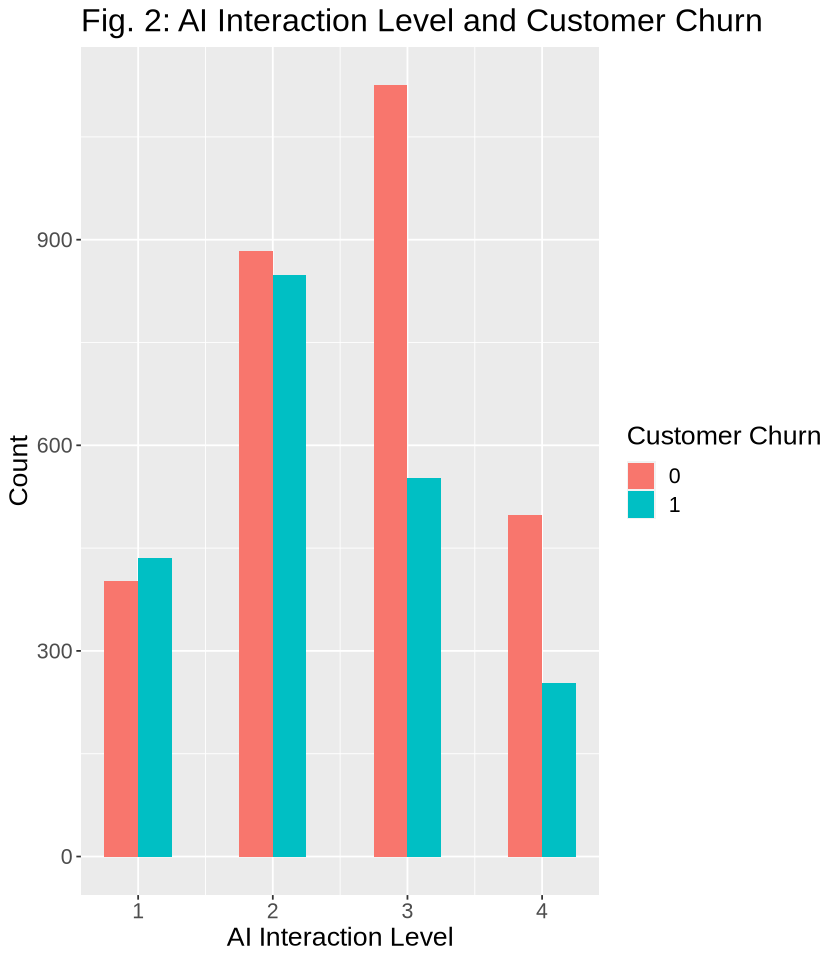

In [7]:
# visualizing relationship between AI interaction level and customer churn

training_ai_interaction <- ggplot(training_set, aes(x = AI_Interaction_Level)) +
    ggtitle("Fig. 2: AI Interaction Level and Customer Churn") +
    geom_histogram(aes(fill = Customer_Churn), position = "dodge", binwidth = 0.5) +
    xlab("AI Interaction Level") +
    ylab("Count") +
    labs(fill = "Customer Churn") +
    theme(text = element_text(size = 16))

training_ai_interaction

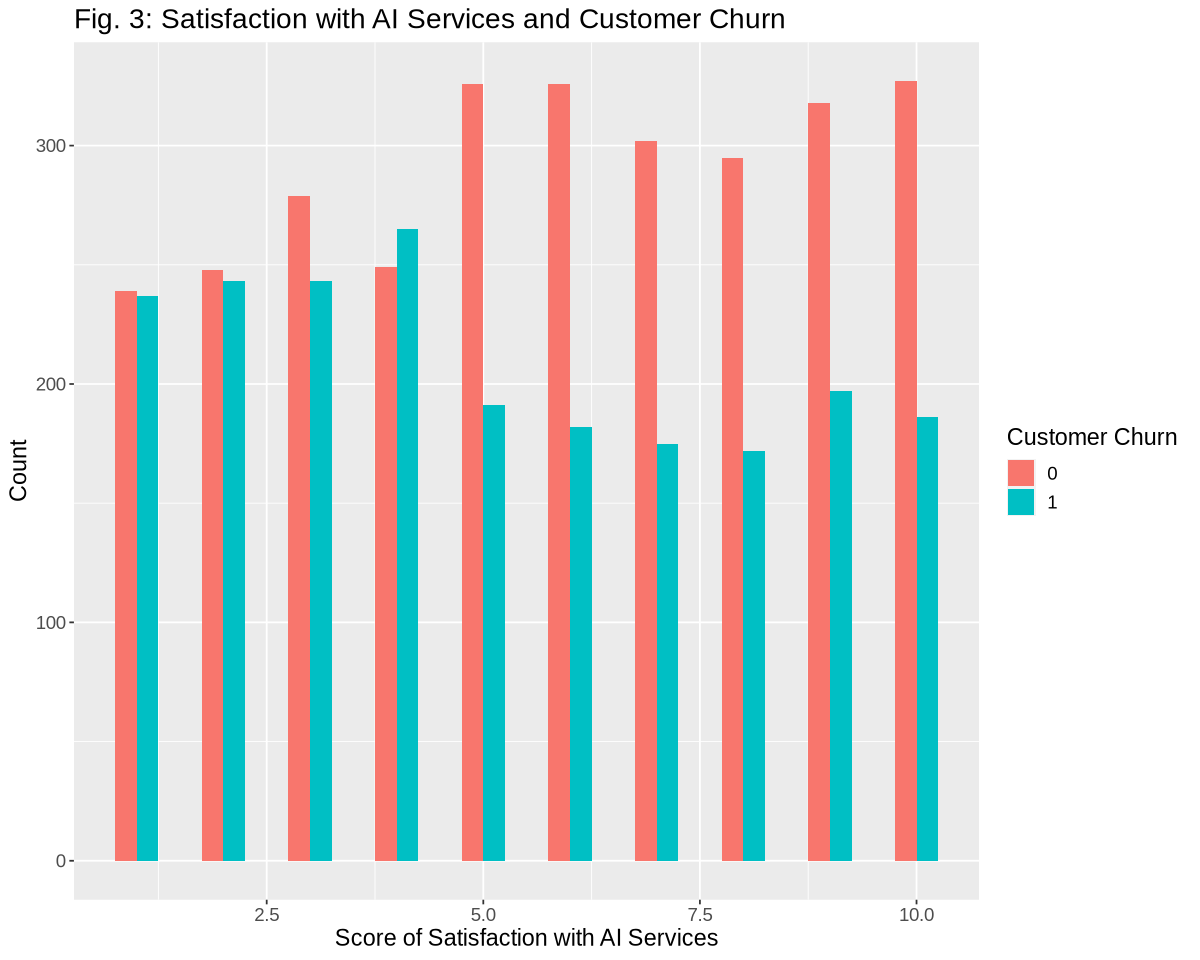

In [8]:
# visualizing relationship between satisfaction with AI services and customer churn
options(repr.plot.width = 10, repr.plot.height = 8) 

training_ai_satisfaction <- ggplot(training_set, aes(x = Satisfaction_with_AI_Services)) +
    ggtitle("Fig. 3: Satisfaction with AI Services and Customer Churn") +
    geom_histogram(aes(fill = Customer_Churn), position = "dodge", binwidth = 0.5) +
    xlab("Score of Satisfaction with AI Services") +
    ylab("Count") +
    labs(fill = "Customer Churn") +
    theme(text = element_text(size = 14))
training_ai_satisfaction

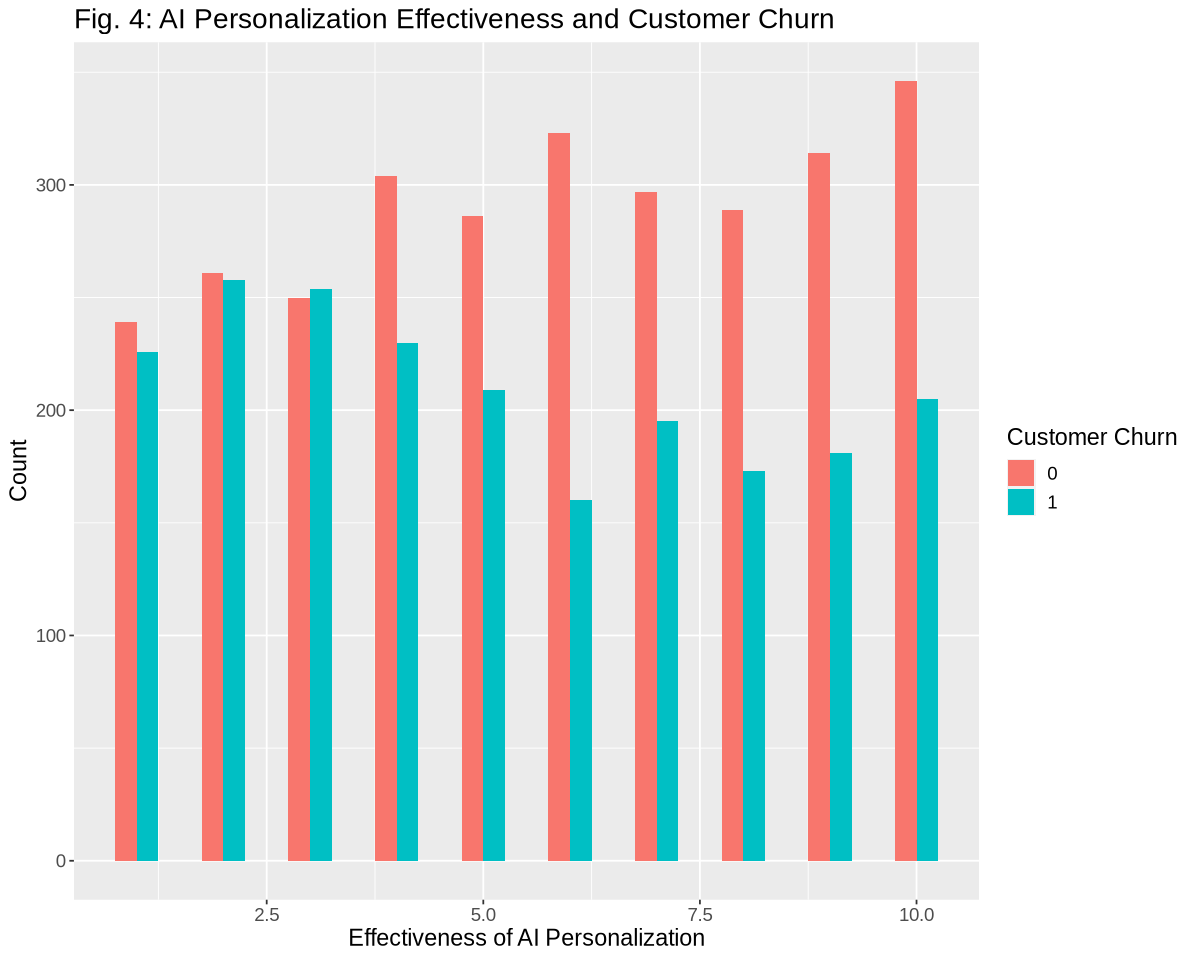

In [9]:
# visualizing relationship between AI personalization effectiveness and customer churn

training_ai_personalization <- ggplot(training_set, aes(x = AI_Personalization_Effectiveness)) +
    ggtitle("Fig. 4: AI Personalization Effectiveness and Customer Churn") +
    geom_histogram(aes(fill = Customer_Churn), position = "dodge", binwidth = 0.5) +
    xlab("Effectiveness of AI Personalization") +
    ylab("Count") +
    labs(fill = "Customer Churn") +
    theme(text = element_text(size = 14))
training_ai_personalization

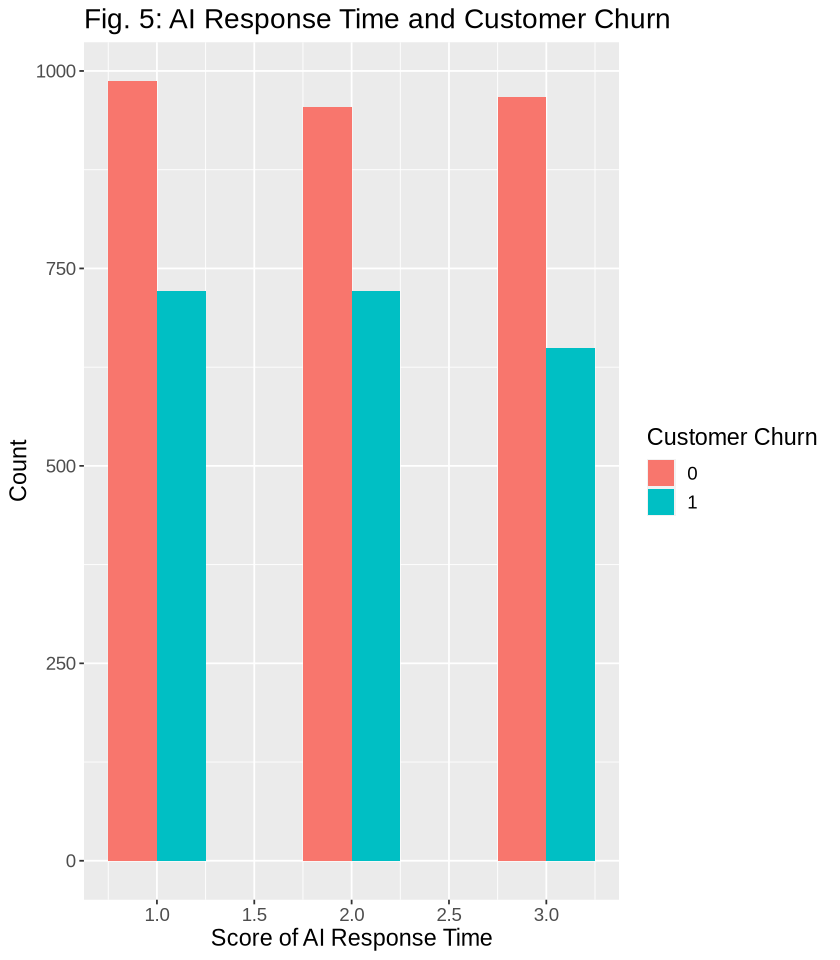

In [10]:
# visualizing relationship between AI response time and customer churn
options(repr.plot.width = 7, repr.plot.height = 8)

training_ai_response_time <- ggplot(training_set, aes(x = AI_Response_Time)) +
    ggtitle("Fig. 5: AI Response Time and Customer Churn") +
    geom_histogram(aes(fill = Customer_Churn), position = "dodge", binwidth = 0.5) +
    xlab("Score of AI Response Time") +
    ylab("Count") +
    labs(fill = "Customer Churn") +
    theme(text = element_text(size = 14))
training_ai_response_time

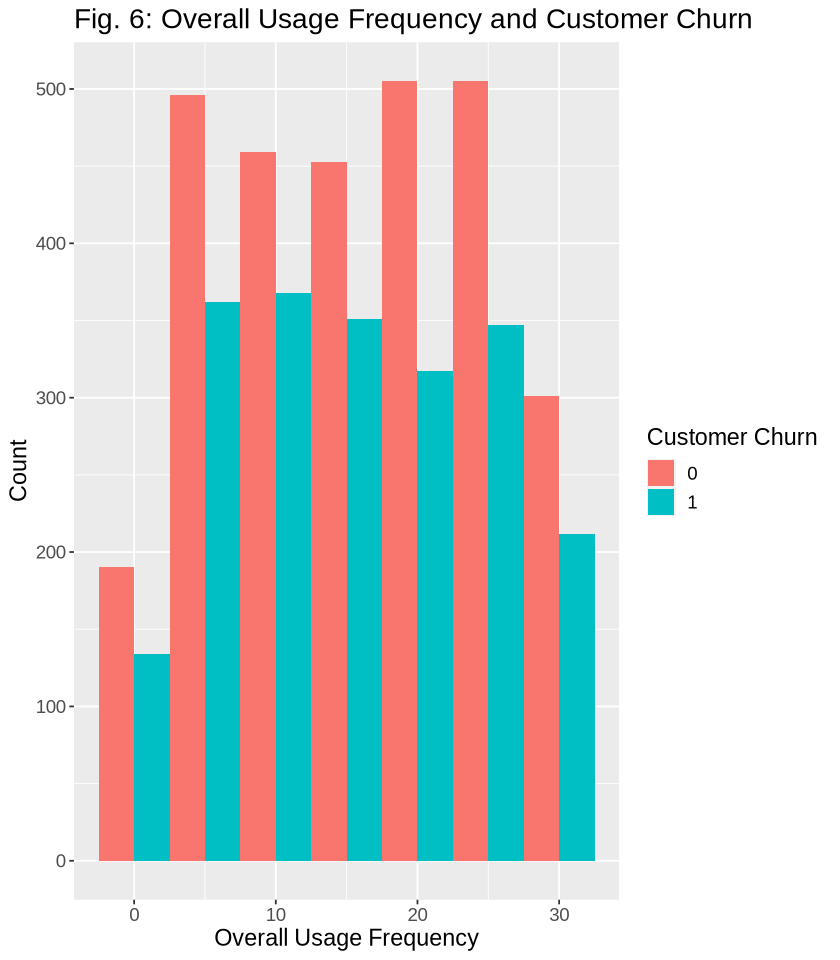

In [11]:
# visualizing relationship between overall AI usage frequency and customer churn

training_ai_usage_frequency <- ggplot(training_set, aes(x = Overall_Usage_Frequency)) +
    ggtitle("Fig. 6: Overall Usage Frequency and Customer Churn") +
    geom_histogram(aes(fill = Customer_Churn), position = "dodge", binwidth = 5) +
    xlab("Overall Usage Frequency") +
    ylab("Count") +
    labs(fill = "Customer Churn") +
    theme(text = element_text(size = 14))
training_ai_usage_frequency

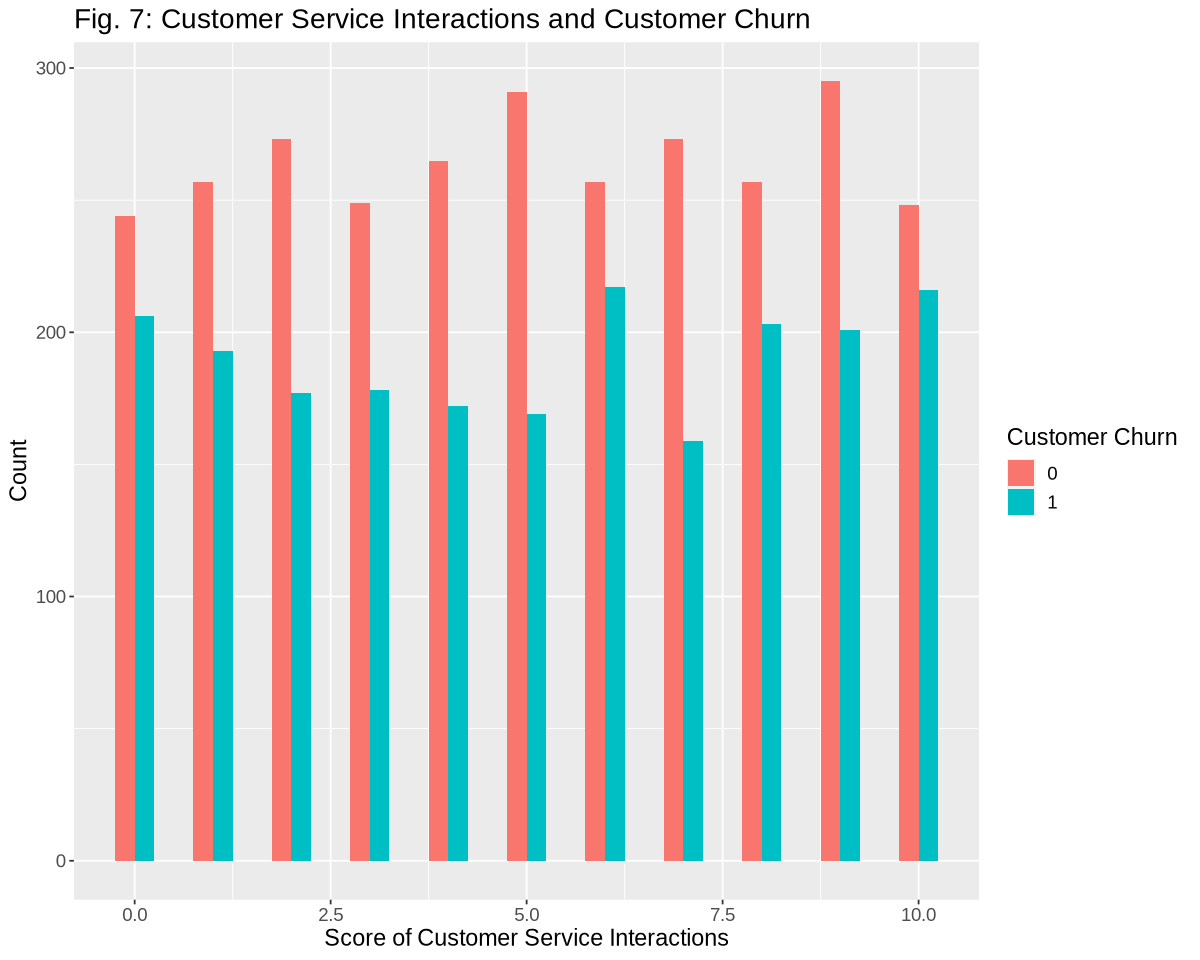

In [12]:
# visualizing relationship between satisfaction with AI services and customer churn
options(repr.plot.width = 10, repr.plot.height = 8)

training_ai_customer_service <- ggplot(training_set, aes(x = Customer_Service_Interactions)) +
    ggtitle("Fig. 7: Customer Service Interactions and Customer Churn") +
    geom_histogram(aes(fill = Customer_Churn), position = "dodge", binwidth = 0.5) +
    xlab("Score of Customer Service Interactions") +
    ylab("Count") +
    labs(fill = "Customer Churn") +
    theme(text = element_text(size = 14))
training_ai_customer_service

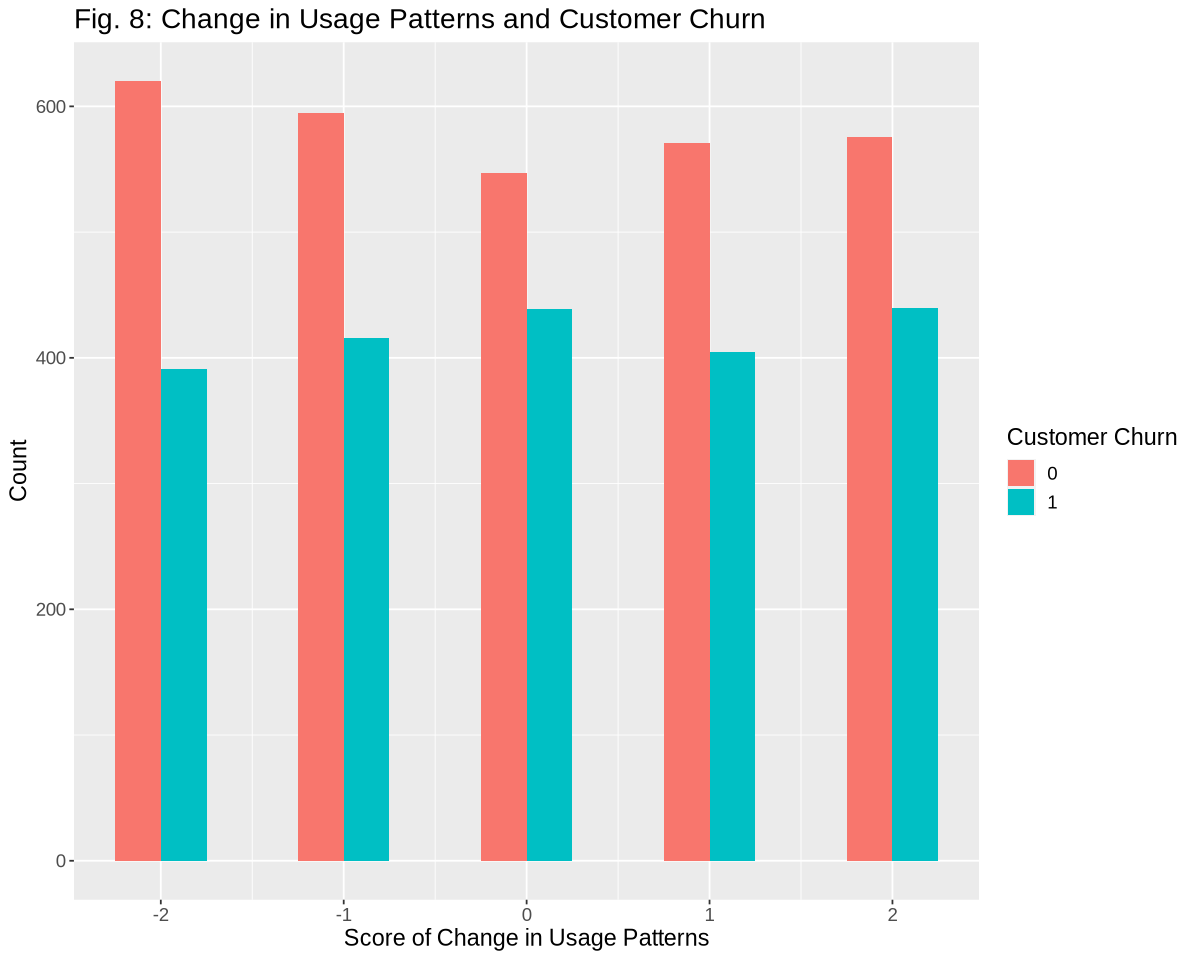

In [13]:
# visualizing relationship between satisfaction with AI services and customer churn

training_ai_usage_patterns <- ggplot(training_set, aes(x = Change_in_Usage_Patterns)) +
    ggtitle("Fig. 8: Change in Usage Patterns and Customer Churn") +
    geom_histogram(aes(fill = Customer_Churn), position = "dodge", binwidth = 0.5) +
    xlab("Score of Change in Usage Patterns") +
    ylab("Count") +
    labs(fill = "Customer Churn") +
    theme(text = element_text(size = 14))
training_ai_usage_patterns

## Variable Selection

In [14]:
# removing ID column from datasets

training_set_noid <- training_set %>%
    select(-ID)
head(training_set_noid)

testing_set_noid <- testing_set %>%
    select(-ID)
head(testing_set_noid)

Age,AI_Interaction_Level,Satisfaction_with_AI_Services,AI_Personalization_Effectiveness,AI_Response_Time,Overall_Usage_Frequency,Customer_Service_Interactions,Change_in_Usage_Patterns,Customer_Churn
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
59,2,7,7,2,18,5,2,1
49,2,6,5,1,3,2,0,0
35,2,3,3,3,8,2,1,1
63,2,3,3,2,6,6,2,1
28,4,6,6,1,11,3,-1,0
41,3,1,1,3,28,2,-1,0


Age,AI_Interaction_Level,Satisfaction_with_AI_Services,AI_Personalization_Effectiveness,AI_Response_Time,Overall_Usage_Frequency,Customer_Service_Interactions,Change_in_Usage_Patterns,Customer_Churn
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
59,1,2,3,1,11,5,-1,1
49,3,4,3,2,2,0,2,1
35,3,7,6,2,22,4,0,1
63,2,8,8,1,25,4,-1,1
28,4,5,5,2,14,1,1,1
41,2,3,2,3,26,4,0,0


In [15]:
# performing forward selection to choose relevant variables

customer_churn_forward_sel <- regsubsets(
  x = Customer_Churn ~ ., nvmax = 8,
  data = training_set_noid,
  method = "forward",
)

customer_churn_forward_summary <- summary(customer_churn_forward_sel)
customer_churn_forward_summary

Subset selection object
Call: regsubsets.formula(x = Customer_Churn ~ ., nvmax = 8, data = training_set_noid, 
    method = "forward", )
8 Variables  (and intercept)
                                 Forced in Forced out
Age                                  FALSE      FALSE
AI_Interaction_Level                 FALSE      FALSE
Satisfaction_with_AI_Services        FALSE      FALSE
AI_Personalization_Effectiveness     FALSE      FALSE
AI_Response_Time                     FALSE      FALSE
Overall_Usage_Frequency              FALSE      FALSE
Customer_Service_Interactions        FALSE      FALSE
Change_in_Usage_Patterns             FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: forward
         Age AI_Interaction_Level Satisfaction_with_AI_Services
1  ( 1 ) " " "*"                  " "                          
2  ( 1 ) " " "*"                  "*"                          
3  ( 1 ) " " "*"                  "*"                          
4  ( 1 ) "*" "*"                

In [16]:
customer_churn_forward_summary <- tibble(
    n_input_variables = 1:8,
    RSQ = customer_churn_forward_summary$rsq,
    RSS = customer_churn_forward_summary$rss,
    ADJ.R2 = customer_churn_forward_summary$adjr2,
    Cp = customer_churn_forward_summary$cp,
    BIC = customer_churn_forward_summary$bic,
)
customer_churn_forward_summary

n_input_variables,RSQ,RSS,ADJ.R2,Cp,BIC
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.02370919,1187.701,0.02351385,62.168176,-102.9395
2,0.03492680,1174.054,0.03454054,6.049664,-152.2050
3,0.03556348,1173.279,0.03498435,4.751026,-146.9875
4,0.03607130,1172.661,0.03529939,4.119997,-141.1038
5,0.03638917,1172.275,0.03542440,4.473136,-134.2357
6,0.03662798,1171.984,0.03547031,5.235831,-126.9578
7,0.03665766,1171.948,0.03530682,7.082083,-118.5946
8,0.03667350,1171.929,0.03512940,9.000000,-110.1597


Using BIC, as is generally done for predictive models, we would only be selecting two input variables --  ```AI_Interaction_Level``` and ```Satisfaction_with_AI_Services```. 
However, for the sake of having a more accurate model, let's also make another model with 6 input variables as inferred from the adjusted R^2 method: ```AI_Interaction_Level```, ```Satisfaction_with_AI_Services```, ```Change_in_Usage_Patterns```, ```Age```, ```Overall_Usage_Frequency```, and ```AI_Response_Time```. 

## Building the Model(s) Using Logistic Regression

### 1. With two input variables based on BIC

In [27]:
# training model using glm()

model.1.1 <- glm(Customer_Churn ~ AI_Interaction_Level + Satisfaction_with_AI_Services,
            data = training_set,
            family = "binomial")

summary(model.1.1)


Call:
glm(formula = Customer_Churn ~ AI_Interaction_Level + Satisfaction_with_AI_Services, 
    family = "binomial", data = training_set)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4021  -1.0401  -0.8355   1.2535   1.7192  

Coefficients:
                              Estimate Std. Error z value Pr(>|z|)    
(Intercept)                    0.93735    0.10088   9.292  < 2e-16 ***
AI_Interaction_Level          -0.34573    0.03152 -10.968  < 2e-16 ***
Satisfaction_with_AI_Services -0.07732    0.01024  -7.547 4.44e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 6797.0  on 4999  degrees of freedom
Residual deviance: 6619.8  on 4997  degrees of freedom
AIC: 6625.8

Number of Fisher Scoring iterations: 4


In [18]:
# training model using glmnet engine

model.1.2 <- logistic_reg(mixture = 1.0, penalty = 1.0) %>%
  set_engine("glmnet") %>%
  set_mode("classification") %>%
  fit(Customer_Churn ~ ., data = training_set_noid)

# Model summary
tidy(model.1.2)

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-8



term,estimate,penalty
<chr>,<dbl>,<dbl>
(Intercept),-0.330167,1
Age,0.000000,1
AI_Interaction_Level,0.000000,1
Satisfaction_with_AI_Services,0.000000,1
AI_Personalization_Effectiveness,0.000000,1
AI_Response_Time,0.000000,1
Overall_Usage_Frequency,0.000000,1
Customer_Service_Interactions,0.000000,1
Change_in_Usage_Patterns,0.000000,1


In [19]:
# Class Predictions
Pred_Class_1.2<- predict(model.1.2,
                      new_data = testing_set_noid,
                      type = "class")
Pred_Class_1.2

.pred_class
<fct>
0
0
0
0
0
0
0
0
0


In [20]:
model.1.2_results <- testing_set_noid %>%
           select(Customer_Churn) %>%
           bind_cols(Pred_Class_1.2)
head(model.1.2_results)
accuracy(model.1.2_results, truth = Customer_Churn, estimate = .pred_class)

Customer_Churn,.pred_class
<fct>,<fct>
1,0
1,0
1,0
1,0
1,0
0,0


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.5712


In [21]:
Pred_Class_1.1 <- predict(model.1.1,
                      new_data = testing_set_noid,
                      type = "response")

In [ ]:
model.1.1_results <- testing_set_noid %>%
           select(Customer_Churn) 

head(model.1.1_results)
accuracy(model.1.1_results, truth = Customer_Churn, estimate = .pred_class)

In [23]:
training_set_model2 <- training_set_noid %>%
    select(-c("AI_Personalization_Effectiveness", "Customer_Service_Interactions"))

head(training_set_model2)

Age,AI_Interaction_Level,Satisfaction_with_AI_Services,AI_Response_Time,Overall_Usage_Frequency,Change_in_Usage_Patterns,Customer_Churn
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
59,2,7,2,18,2,1
49,2,6,1,3,0,0
35,2,3,3,8,1,1
63,2,3,2,6,2,1
28,4,6,1,11,-1,0
41,3,1,3,28,-1,0


In [24]:
model.2.2 <- logistic_reg(mixture = 1.0, penalty = 1.0) %>%
  set_engine("glmnet") %>%
  set_mode("classification") %>%
  fit(Customer_Churn ~ ., data = training_set_model2)

# Model summary
tidy(model.2.2)

term,estimate,penalty
<chr>,<dbl>,<dbl>
(Intercept),-0.330167,1
Age,0.000000,1
AI_Interaction_Level,0.000000,1
Satisfaction_with_AI_Services,0.000000,1
AI_Response_Time,0.000000,1
Overall_Usage_Frequency,0.000000,1
Change_in_Usage_Patterns,0.000000,1


In [25]:
Pred_Class_2.2<- predict(model.2.2,
                      new_data = testing_set_noid,
                      type = "class")
Pred_Class_2.2

.pred_class
<fct>
0
0
0
0
0
0
0
0
0


In [26]:
model.2.2_results <- testing_set_noid %>%
           select(Customer_Churn) %>%
           bind_cols(Pred_Class_2.2)
head(model.2.2_results)
accuracy(model.2.2_results, truth = Customer_Churn, estimate = .pred_class)

Customer_Churn,.pred_class
<fct>,<fct>
1,0
1,0
1,0
1,0
1,0
0,0


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.5712
